## Carga de datos y revisión inicial


In [27]:
import pandas as pd 
df = pd.read_csv("C:/Users/Usuario/Desktop/DATA_COPIA/EDAII/campaign/nyt1.csv") 
df.shape 

(458441, 5)

## Visualización y descripción básica de nuestra data

In [26]:
df.head()


,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [3]:
df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000



##  grupos de edad o bins, CATEGORÍAS

In [4]:
bins = [0, 18, 25, 35, 45, 55, 65, 110] 
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  
df['age_group'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

In [5]:
df.head()


,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54


## Configuraciones básicas


In [6]:
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set_theme()
sns.set(rc={'figure.figsize':(20,10)})

## Gráficos por género y edad


<Axes: xlabel='age_group', ylabel='count'>

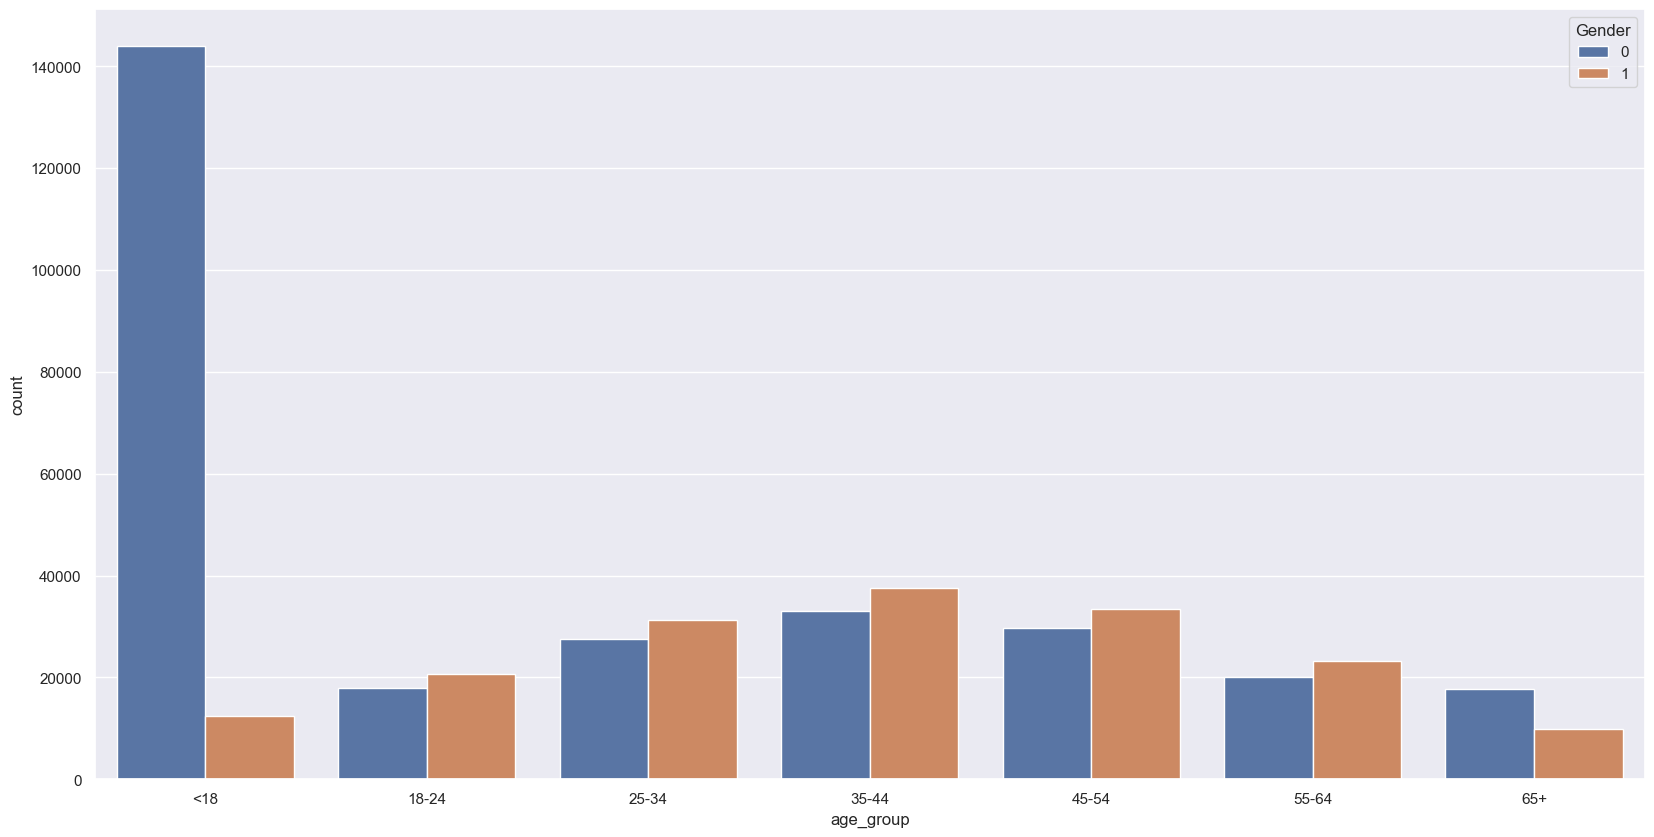

In [7]:
sns.countplot(x='age_group', hue='Gender', data=df) # sacar ppt

## Clics e impresiones de la campaña


<Axes: xlabel='Clicks', ylabel='count'>

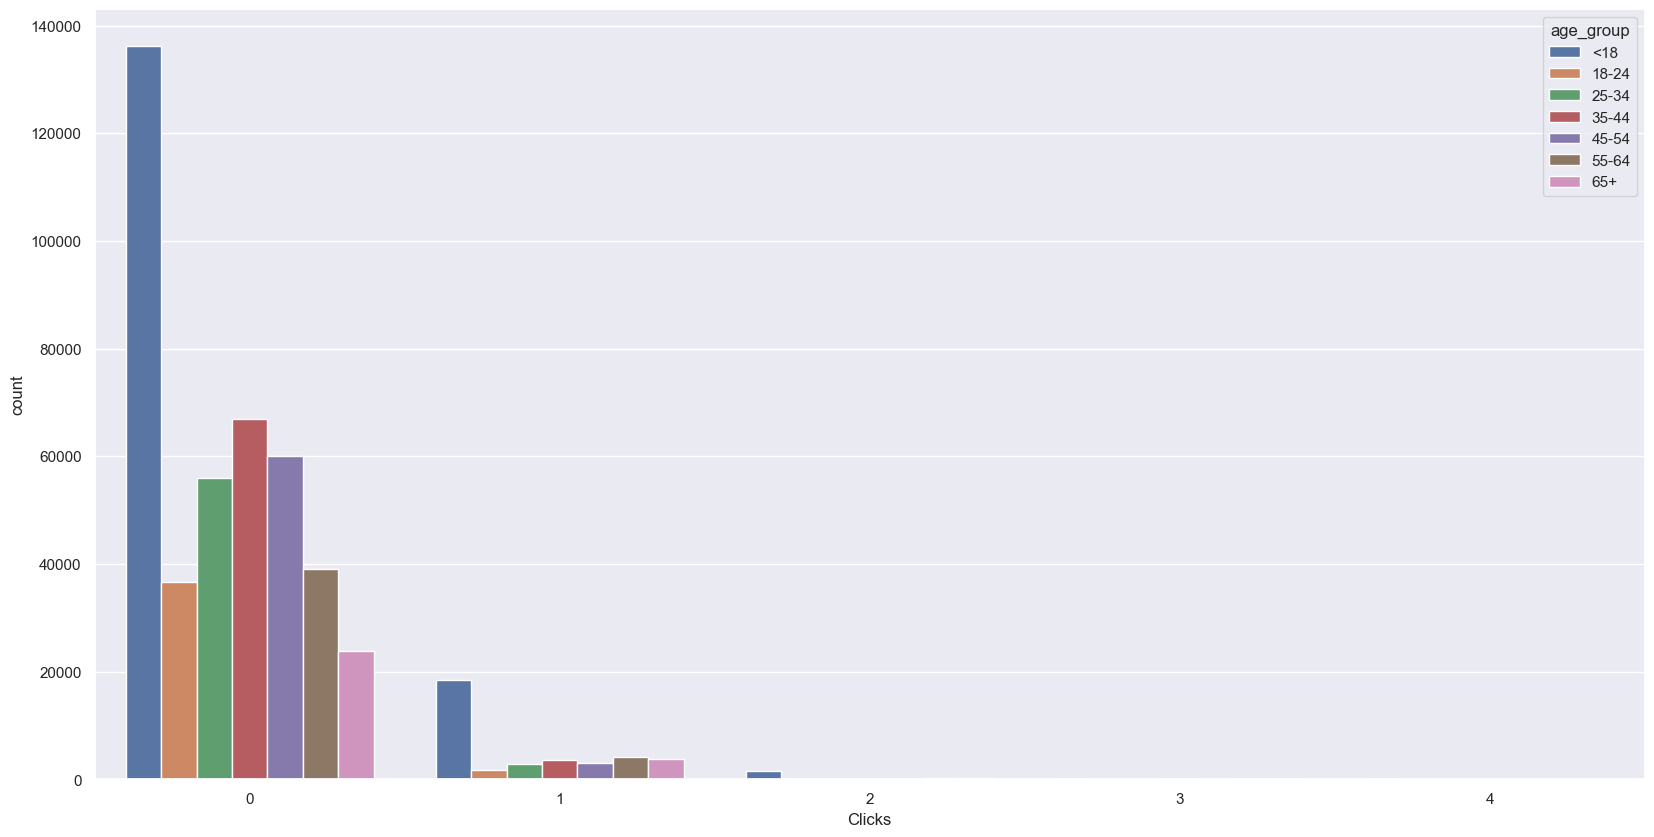

In [8]:
sns.countplot(x='Clicks', hue='age_group', data=df)

In [9]:
df[(df['Clicks']>0) & (df['Impressions']==0)].shape[0]  # para ver si hay clics pero no impresiones ?? --> ver impresiones sin clicks !

0

<Axes: xlabel='Impressions', ylabel='Count'>

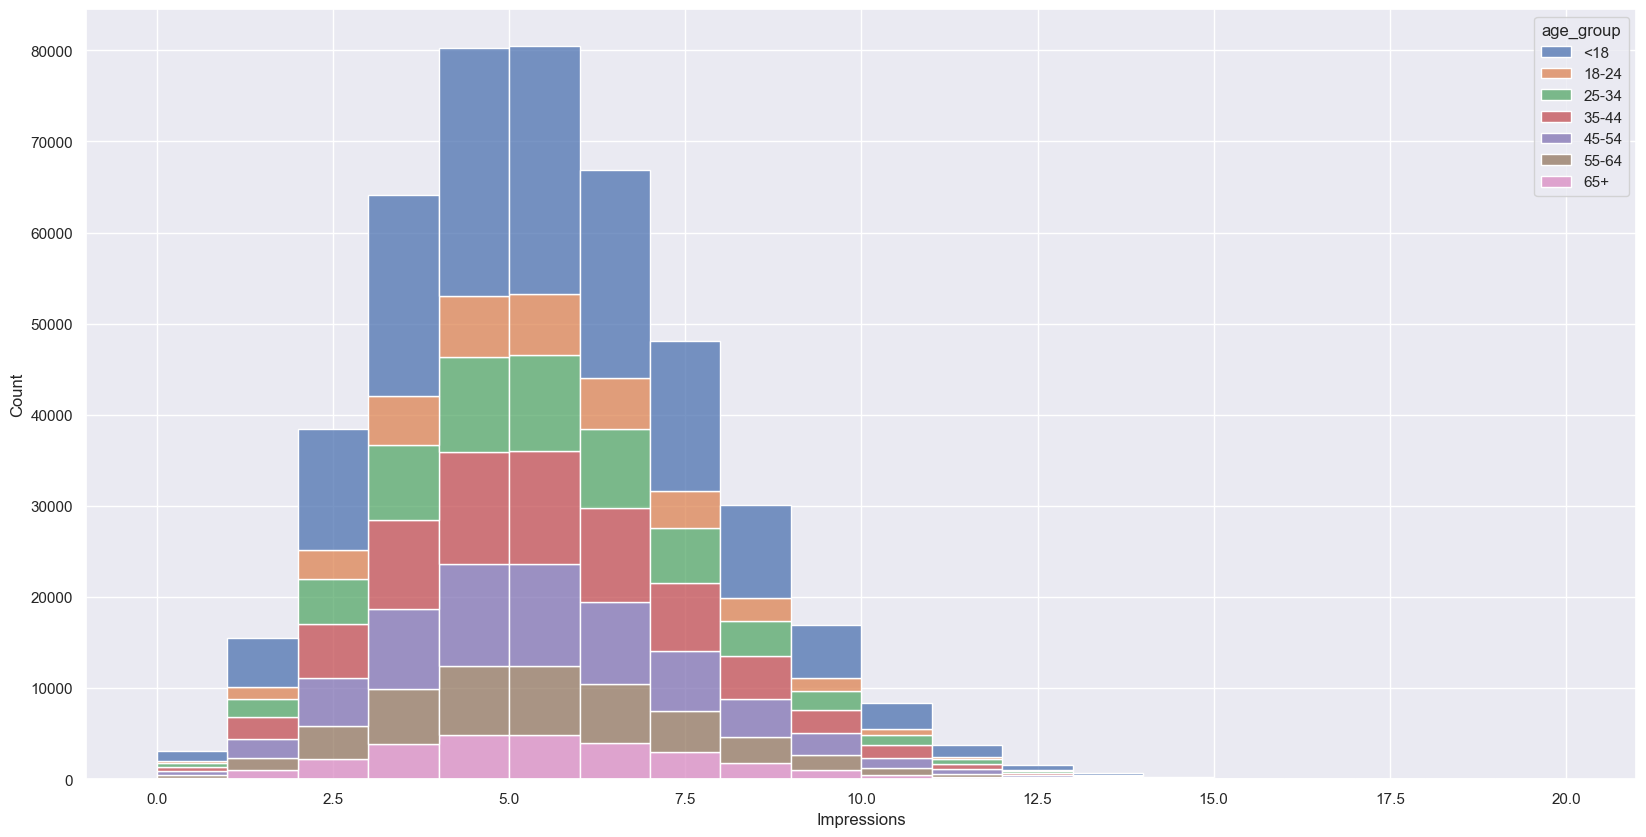

In [10]:
sns.histplot(df, x='Impressions', hue='age_group', stat='count', binwidth=1, multiple='stack')  

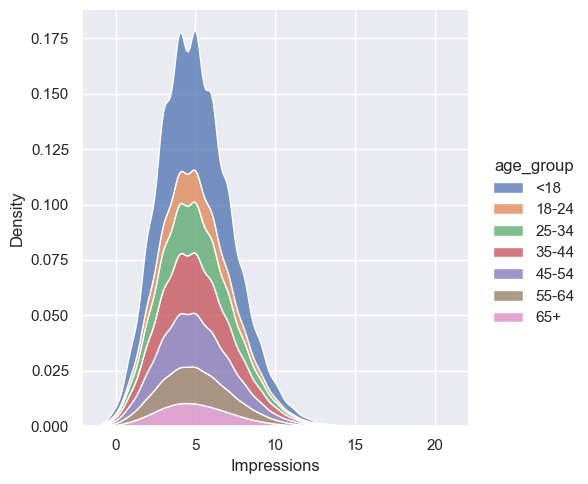

In [11]:
sns.displot(df, x='Impressions', hue='age_group', kind='kde', bw_adjust=2, multiple='stack')

<Axes: xlabel='age_group', ylabel='Impressions'>

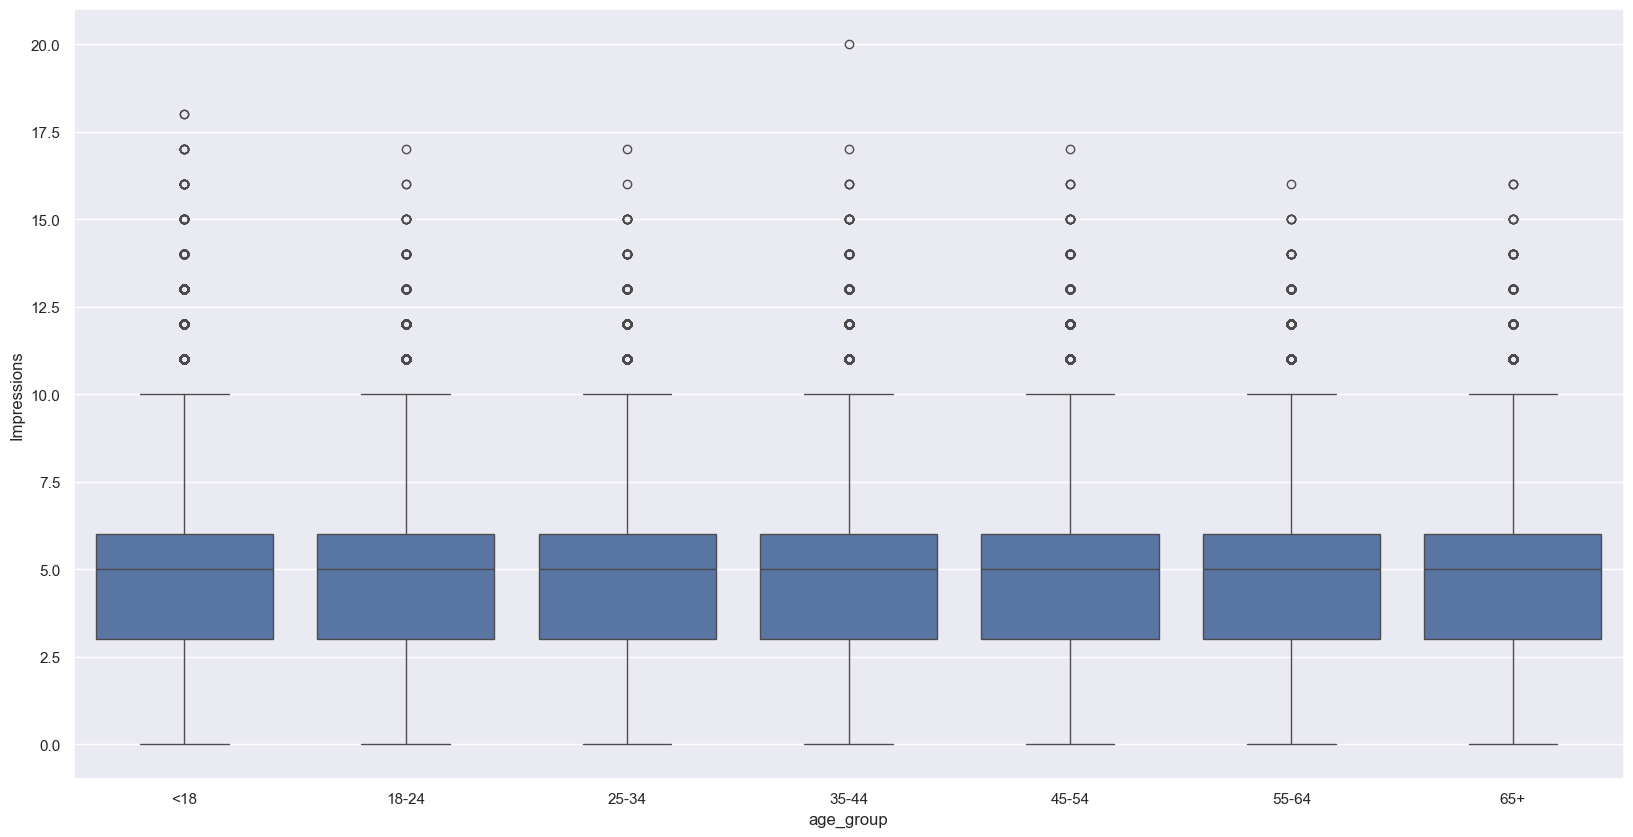

In [12]:
sns.boxplot(y=df['Impressions'], x=df['age_group']) # meter colores

## CTR


<Axes: xlabel='age_group', ylabel='CTR'>

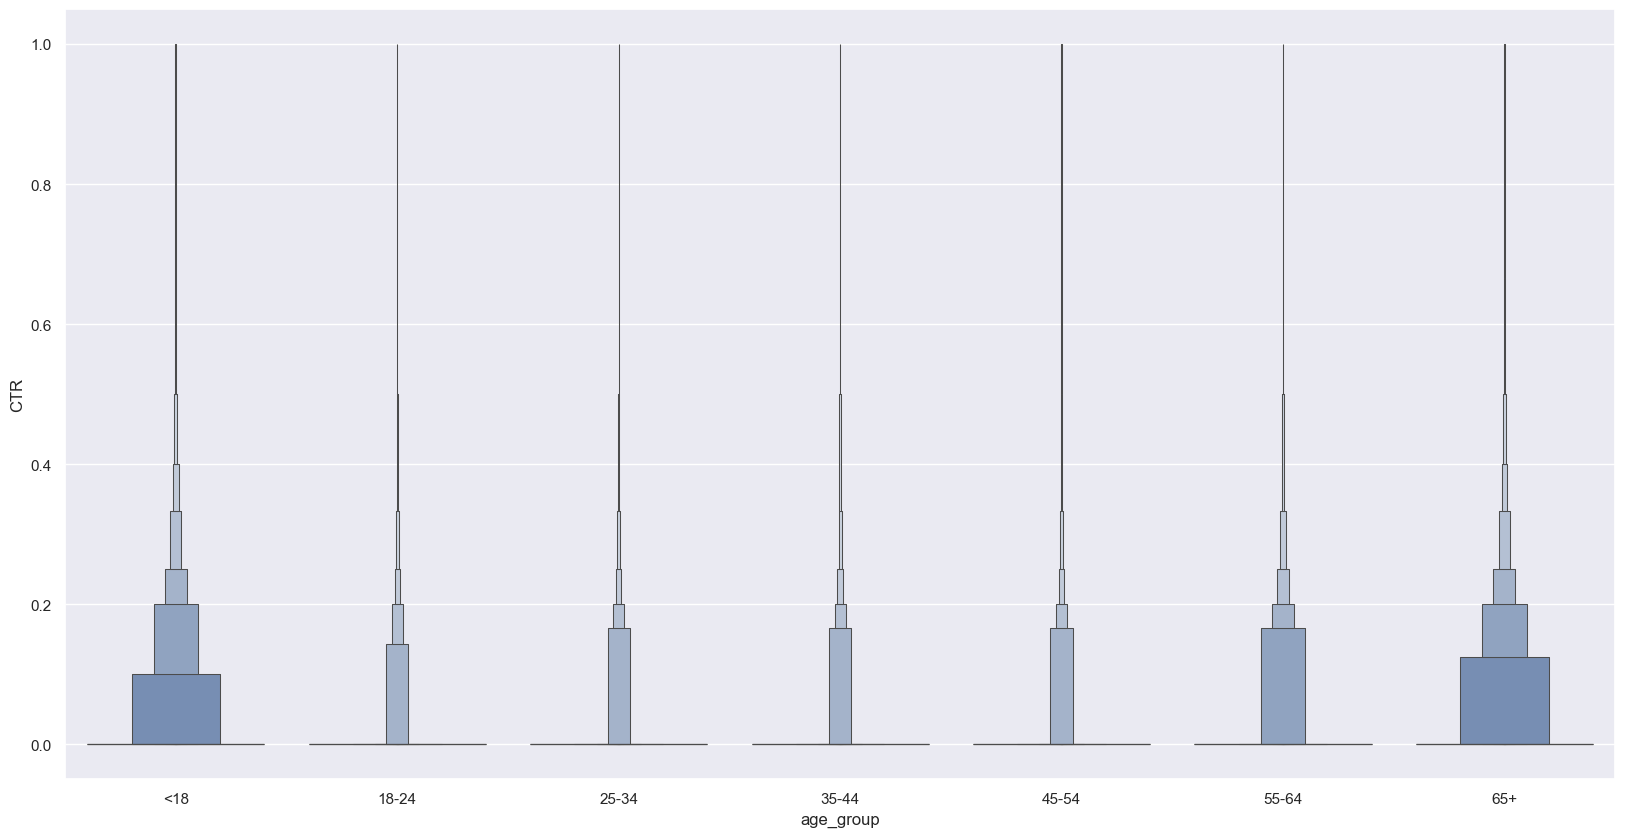

In [13]:
df['CTR'] = round(df['Clicks']/df['Impressions'], 5) # ver redondeo
sns.boxenplot(x=df['age_group'], y=df['CTR'])

In [14]:
bins = [-1, 0, 0.1, 0.2, 0.4, 1]
labels = ['0', '<10%', '10%-20%', '20%-40%', '>40%'] 
df['CTR_group'] = pd.cut(df.CTR, bins, labels = labels,include_lowest = True)  
df.CTR_group.value_counts(normalize=True, sort=True)

CTR_group
0          0.912516
10%-20%    0.054654
20%-40%    0.023328
<10%       0.004996
>40%       0.004506
Name: proportion, dtype: float64

## CTR positivo


In [15]:
df_Clicked = df[df['CTR'] > 0]  
df_Clicked.head()
df_Clicked.shape

(39838, 8)

In [16]:
df_Clicked.age_group.value_counts(normalize=True)

age_group
<18      0.505723
55-64    0.106757
65+      0.099152
35-44    0.090190
45-54    0.079397
25-34    0.073297
18-24    0.045484
Name: proportion, dtype: float64

<Axes: xlabel='age_group', ylabel='CTR'>

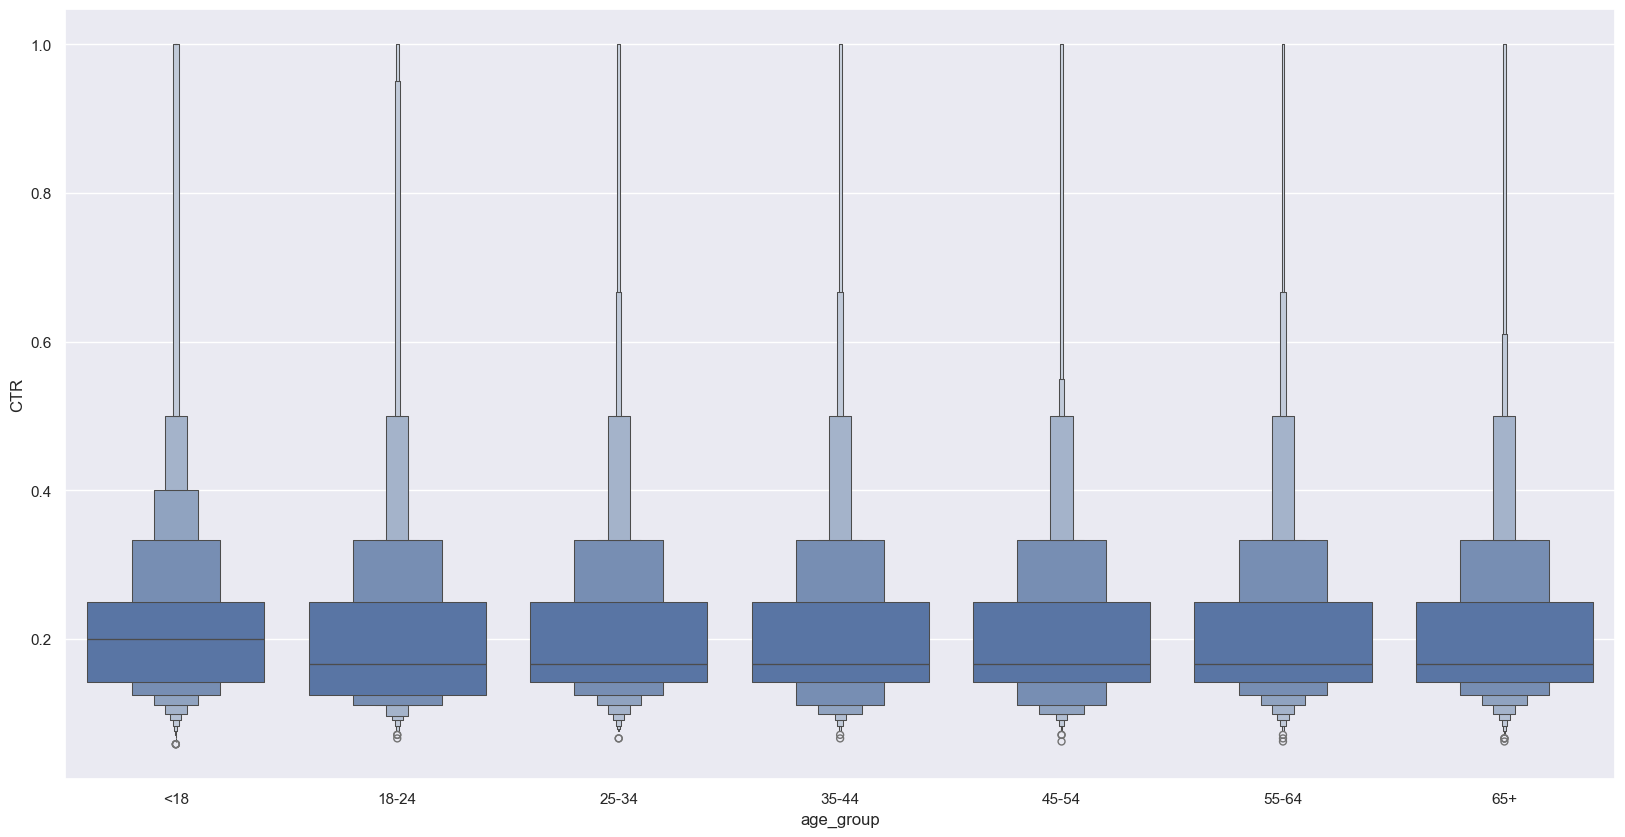

In [17]:
sns.boxenplot(x=df_Clicked['age_group'], y=df_Clicked['CTR'])

<Axes: xlabel='age_group', ylabel='count'>

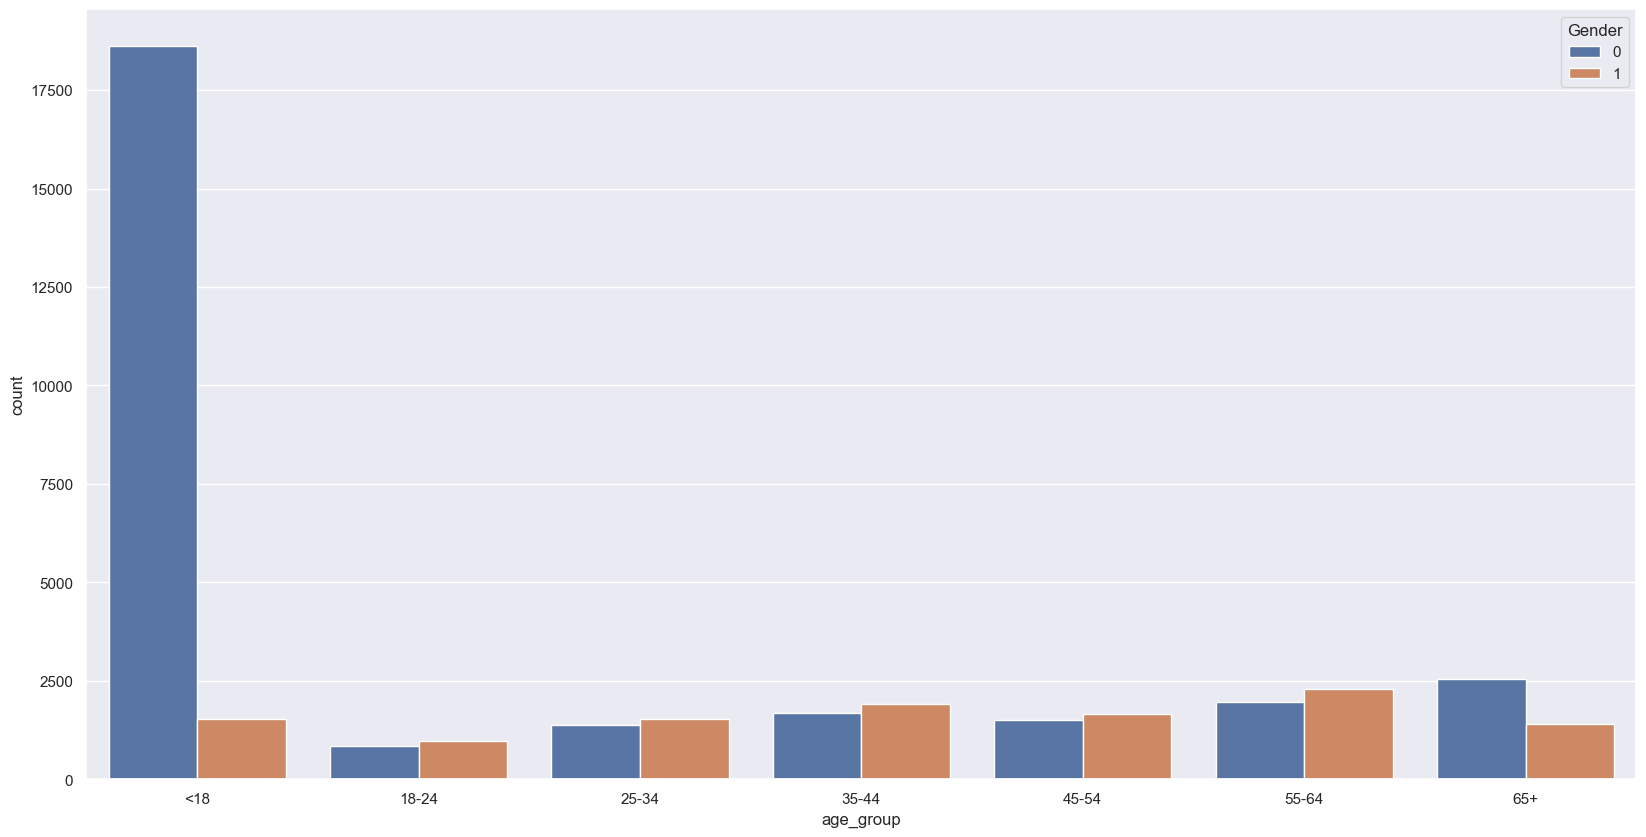

In [18]:
sns.countplot(x='age_group', hue='Gender', data=df_Clicked)

<Axes: xlabel='age_group', ylabel='count'>

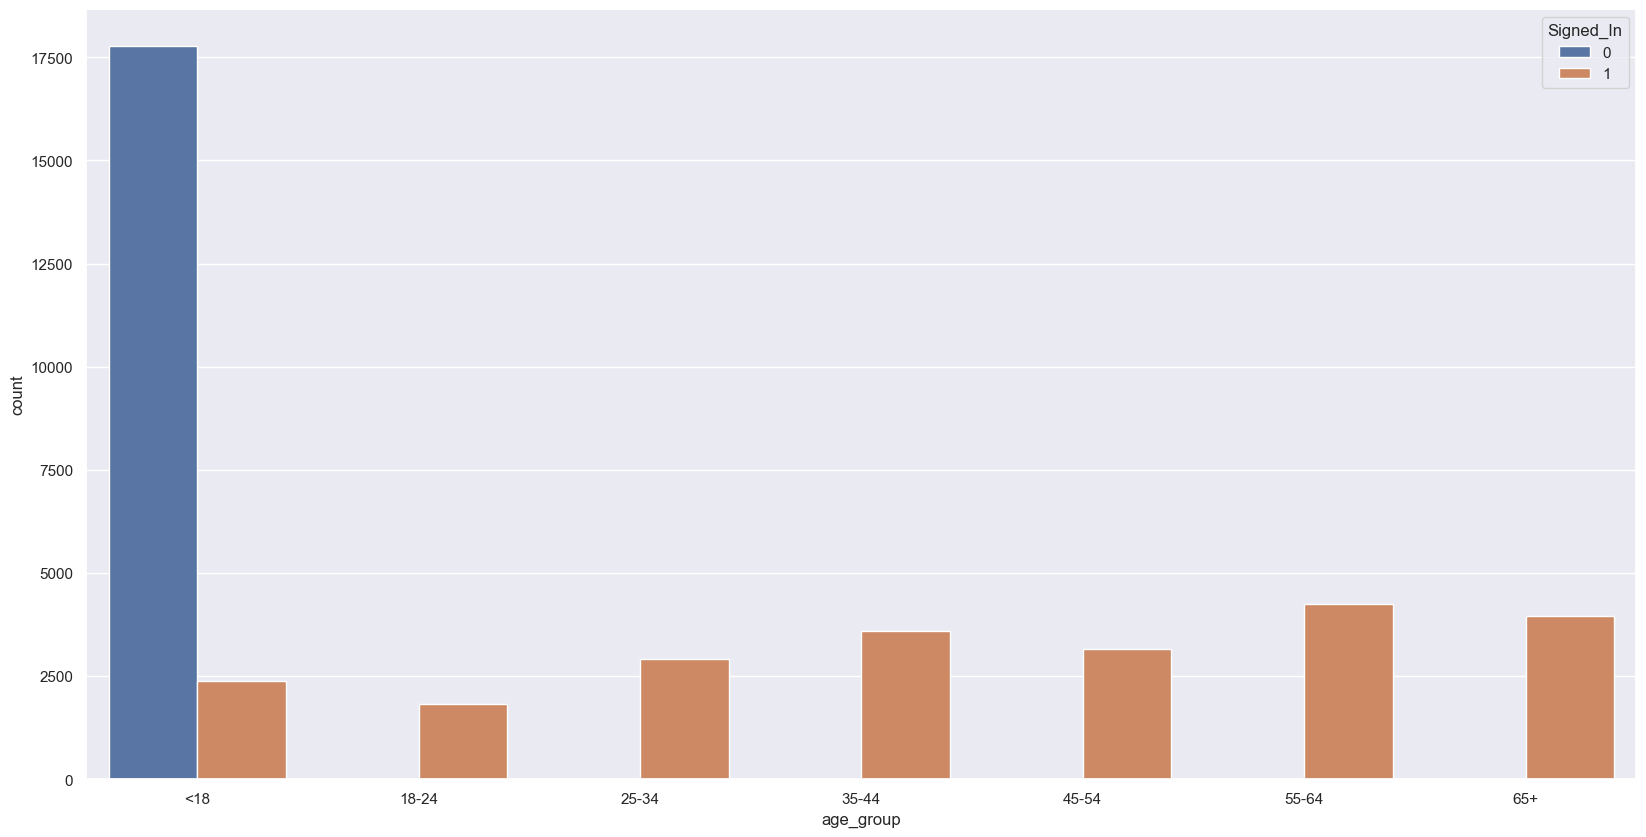

In [19]:
sns.countplot(x='age_group', hue='Signed_In', data=df_Clicked)

<Axes: xlabel='CTR_group', ylabel='count'>

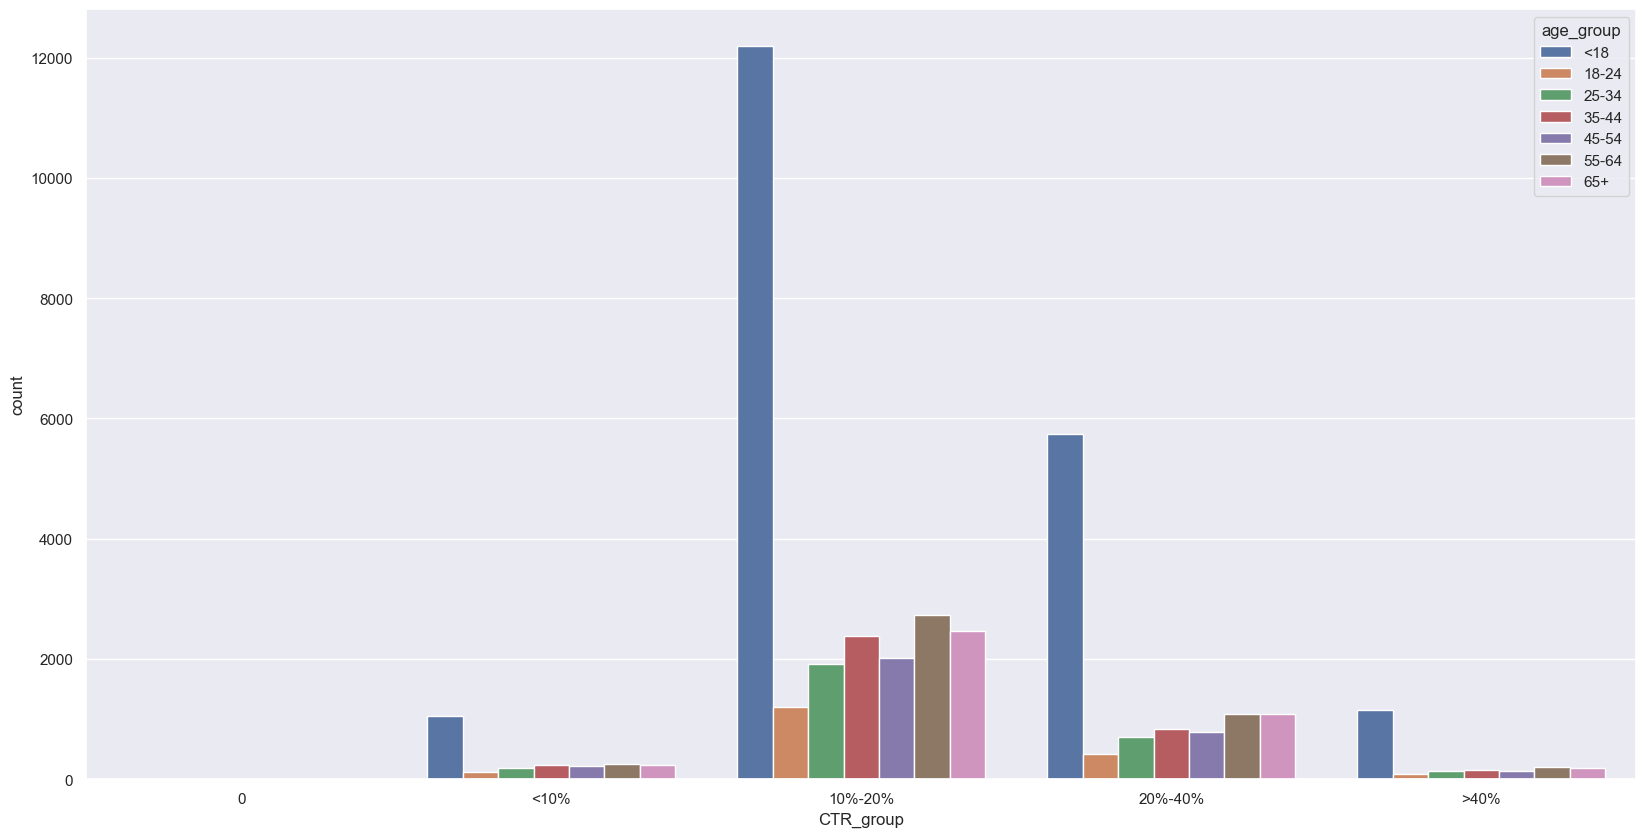

In [20]:
sns.countplot(x='CTR_group', hue='age_group', data=df_Clicked)

<Axes: xlabel='Impressions', ylabel='Count'>

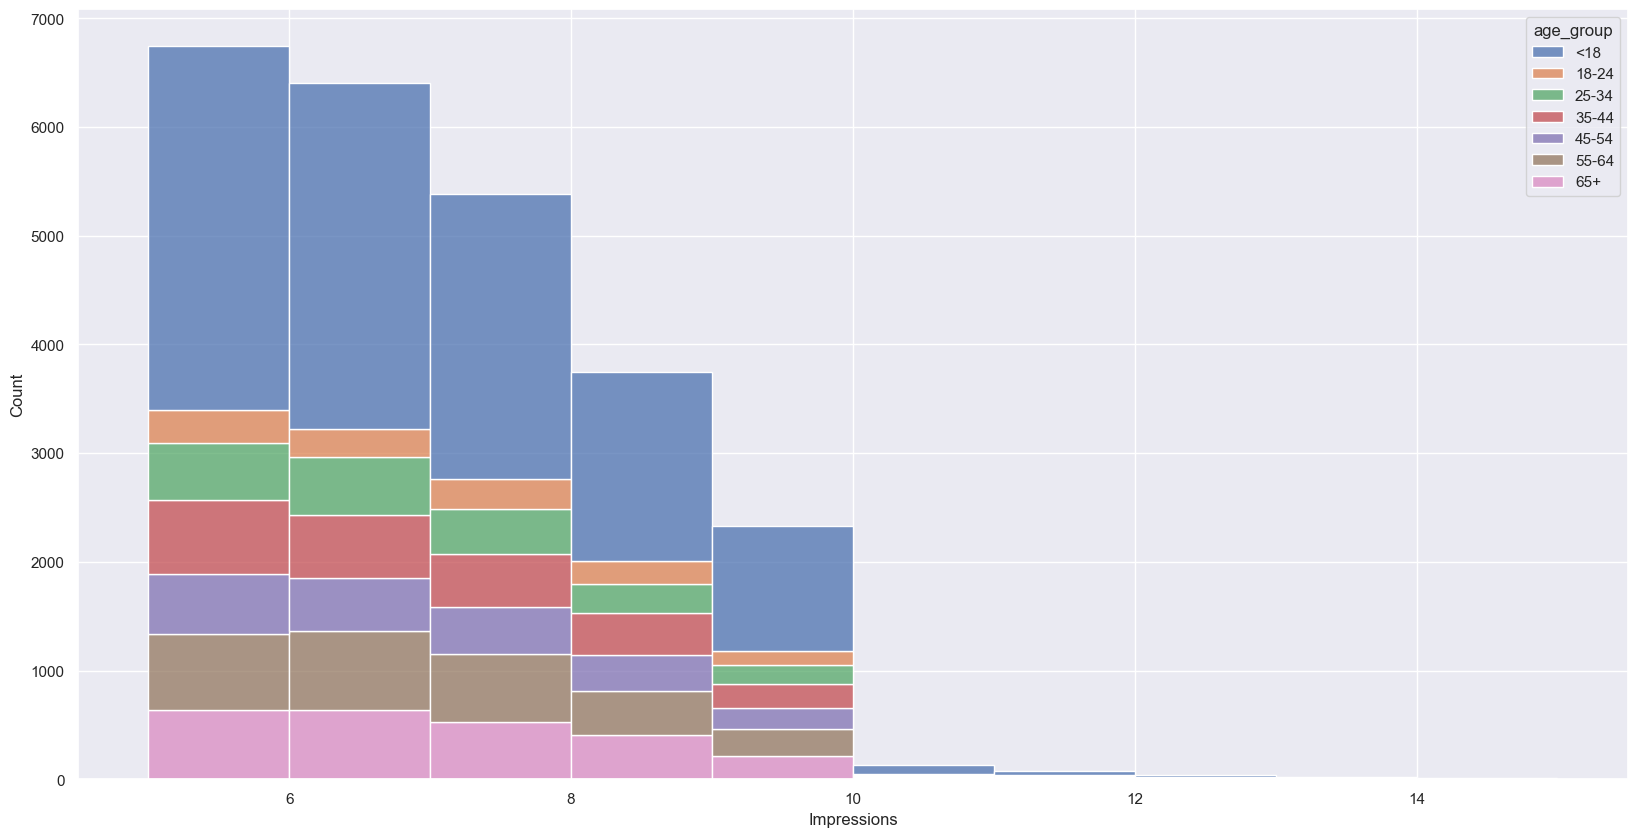

In [21]:
df_Clicked1020 = df_Clicked[df_Clicked['CTR_group'] == '10%-20%']
sns.histplot(df_Clicked1020, x='Impressions', hue='age_group', binwidth=1, stat='count', multiple='stack')

In [22]:
df_Clicked1020.age_group.value_counts(normalize=True)

age_group
<18      0.490236
55-64    0.109571
65+      0.098682
35-44    0.095709
45-54    0.080963
25-34    0.076744
18-24    0.048095
Name: proportion, dtype: float64

In [23]:
df_Clicked1020.Gender.value_counts(normalize=True)

Gender
0    0.706485
1    0.293515
Name: proportion, dtype: float64

In [24]:
df_Clicked1020.Signed_In.value_counts(normalize=True)

Signed_In
1    0.568266
0    0.431734
Name: proportion, dtype: float64